# EV Charging Station Exploration

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cf


In [2]:
evdata = pd.read_csv('alt_fuel_stations (Mar 18 2025).csv')
evdata1 = pd.read_csv("EV_charger_data.csv")

In [3]:
geoevpoints = gpd.GeoDataFrame(evdata, geometry = gpd.points_from_xy(evdata.Longitude, evdata.Latitude), crs = "EPSG:4326") 
geoevpoints1 = gpd.GeoDataFrame(evdata1, geometry = gpd.points_from_xy(evdata1.Longitude, evdata1.Latitude), crs = "EPSG:4326") 

In [4]:
#va_map = gpd.read_file('virginiamap.shp', SHAPE_RESTORE_SHX = 'yes')

In [5]:
geoevpoints1

Latitude   Longitude                     geometry
0      34.248319 -118.387971  POINT (-118.38797 34.24832)
1      34.040539 -118.271387  POINT (-118.27139 34.04054)
2      34.059133 -118.248589  POINT (-118.24859 34.05913)
3      33.759802 -118.096665   POINT (-118.09666 33.7598)
4      33.770508 -118.265628  POINT (-118.26563 33.77051)
...          ...         ...                          ...
65129  45.034636  -93.781423   POINT (-93.78142 45.03464)
65130  47.740087 -117.409868  POINT (-117.40987 47.74009)
65131  33.881076  -84.458256   POINT (-84.45826 33.88108)
65132  32.785965  -96.810923   POINT (-96.81092 32.78597)
65133  33.881076  -84.458256   POINT (-84.45826 33.88108)

[65134 rows x 3 columns]

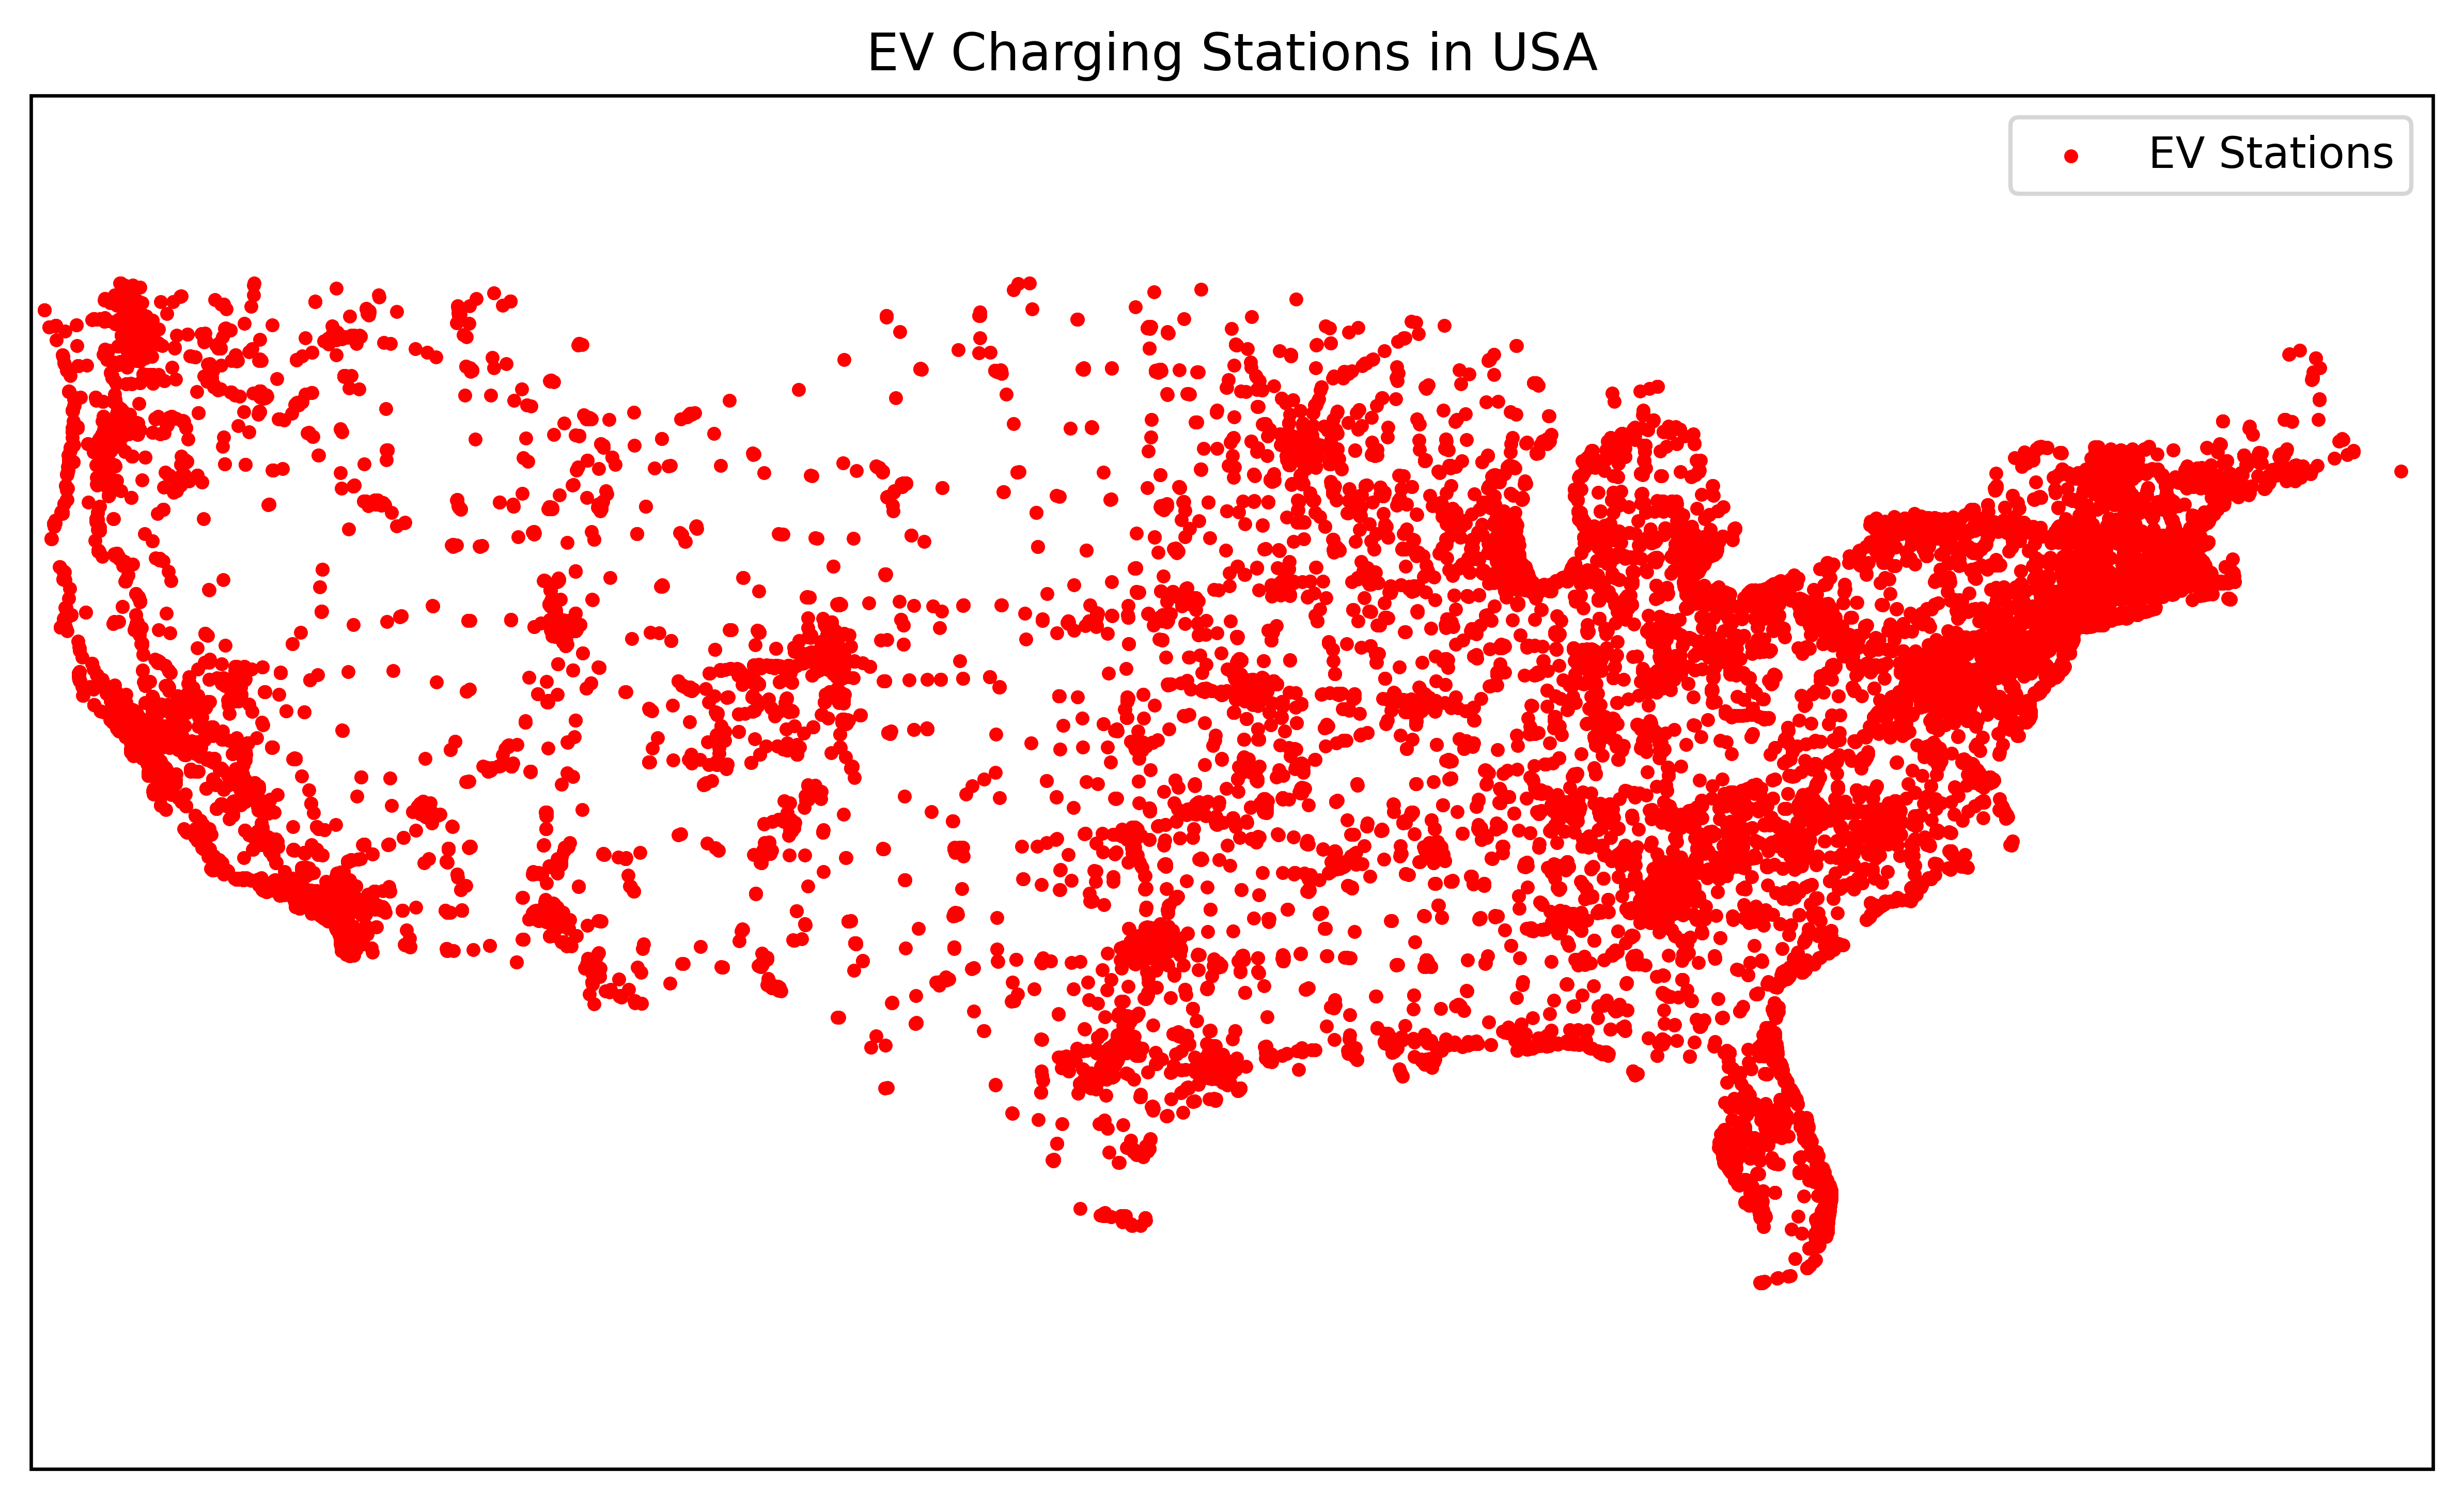

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6), dpi=600)  # Adjust DPI for resolution
#va_map.plot(ax=ax, color='lightgray', edgecolor='black')  # Virginia map
geoevpoints1.plot(ax=ax, markersize=5, color='red', alpha=1, label="EV Stations")  # Plot stations\
plt.title("EV Charging Stations in USA")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(False)

#ax.coastlines(resolution='110m')
#ax.add_feature(cf.BORDERS.with_scale('50m'),edgecolor=[.3,.3,.3],linewidth=1) 
#ax.add_feature(cf.STATES.with_scale('50m'), edgecolor=[.3,.3,.3], linewidth=.5)

ax.set_extent((-125,-65,20,50))


In [3]:
from PIL import Image
import time

In [7]:
img = Image.open("output.png")
width, height = img.size

c:\Python312\Lib\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (162067610 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [8]:
tile_width = 1000
tile_height = 1000

num_tiles_x = width // tile_width
num_tiles_y = height // tile_height

In [9]:
for i in range(num_tiles_y):
    for j in range(num_tiles_x):
        left = j * tile_width
        top = i * tile_height
        right = (j + 1) * tile_width
        bottom = (i + 1) * tile_height
        
        tile = img.crop((left, top, right, bottom))
        #tile.show()
        #tile.save(f"tile_{i}_{j}.png")
        time.sleep(1)

## Opening Original TIF File

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rasterio
from rasterio.plot import show
import numpy as np

In [11]:
with rasterio.open("Annual_NLCD_LndCov_2019_CU_C1V0 (1).tif") as src:
    scale = 100
    data = src.read(
        1,
        out_shape=(
            src.height // scale,
            src.width // scale
        )
    )
    unique_values = np.unique(data)  # Get unique values in the dataset

print("Unique values in raster:", unique_values)

Unique values in raster: [ 11  12  21  22  23  24  31  41  42  43  52  71  81  82  90  95 250]


In [12]:
data_cleaned = np.where(data == 250, np.nan, data)
data_cleaned

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [22]:
fig, ax2 = plt.subplots(figsize=(400, 240))

plt.imshow(data_cleaned, cmap="Set1", origin="upper")
#plt.set_dpi(200)
plt.colorbar(label="Land Cover Class")
plt.title("Land Cover Data (NoData Removed)")
plt.show()

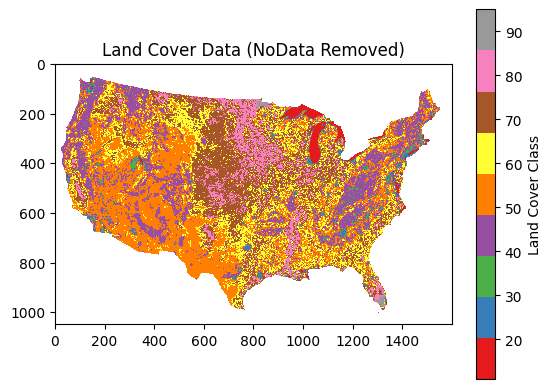

In [16]:
plt.imshow(data_cleaned, cmap="Set1", origin="upper")
plt.colorbar(label="Land Cover Class")
plt.title("Land Cover Data (NoData Removed)")
plt.show()

## New Lat/Lon Tif File

In [2]:
### Importing new Raster file
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from rasterio.crs import CRS
import rioxarray as rxr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rasterio
from rasterio.plot import show
import numpy as np

In [ ]:
from rasterio.plot import show, plotting_extent

# # Load raster
# with rasterio.open("lat_lon_attempt3.tif") as src:
#     data = src.read(1)  # first band
#     extent = plotting_extent(src)  # (left, right, bottom, top)
#     crs = src.crs
#     print("CRS:", crs)

with rasterio.open("lat_lon_attempt3.tif") as src:
    scale = 10
    data = src.read(
        1,
        out_shape=(
            src.height // scale,
            src.width // scale
        )
    )
    extent = plotting_extent(src)

data_cleaned = np.where(data == 250, np.nan, data)


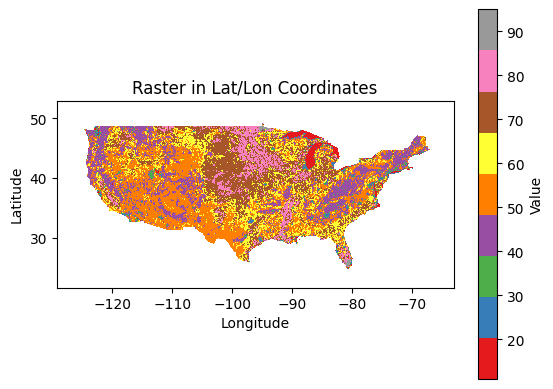

In [39]:
# Plot using lat/lon extent
plt.imshow(data_cleaned, cmap="Set1", extent = extent, origin="upper")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Raster in Lat/Lon Coordinates")
plt.colorbar(label="Value")
plt.show()

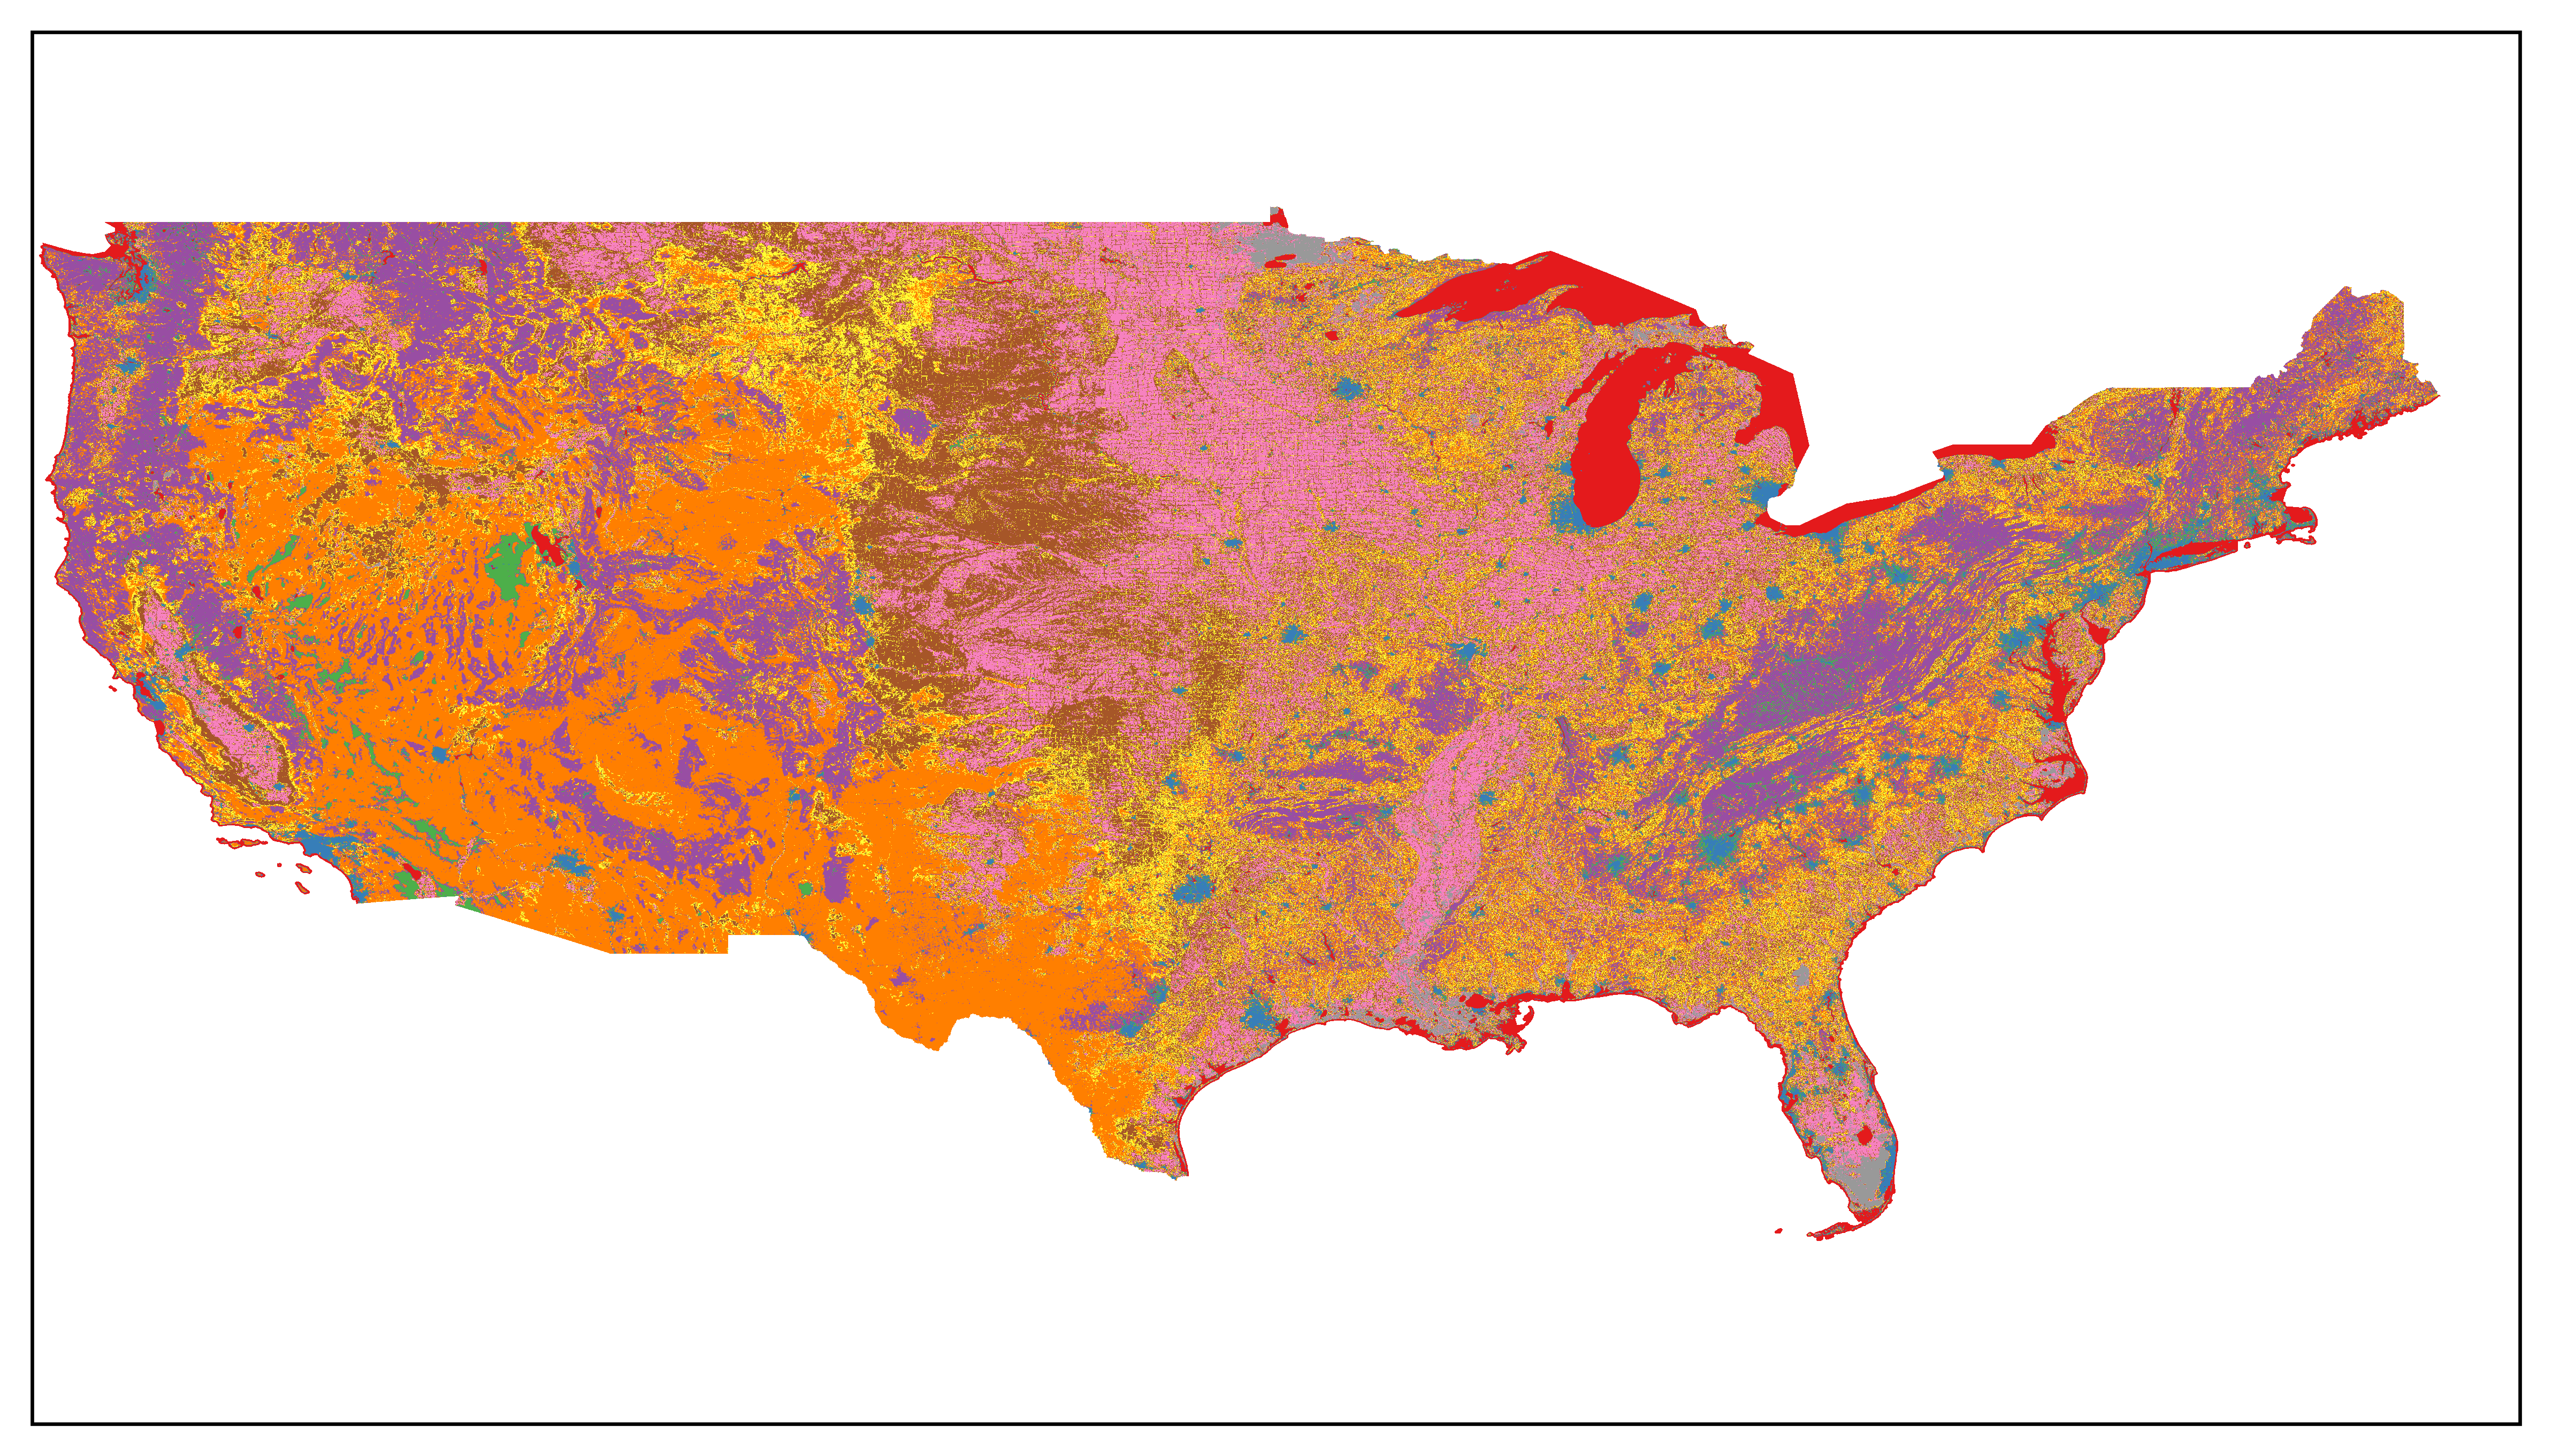

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6), dpi=600)
plt.imshow(data_cleaned, cmap="Set1", extent = extent, origin="upper")

#plt.xlabel("Longitude", size = 40)
#plt.ylabel("Latitude", size = 40)
#plt.title("Raster in Lat/Lon Coordinates")
#plt.colorbar(label="Value")

ax.set_extent((-125,-65,20,50))

plt.show()